# Logistic Regression

Ao invés de tentar adivinhar se está em uma categoria ou outra, tentar achar a probabilidade de uma observação estar em um lado ou no outro.


y = b0 + b1*x

p^ = probability (p_hat)

## Python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
# Create the dataset and X and y datasets
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:,[2,3]].values
y = dataset.iloc[:,4].values

In [15]:
# Split the dataset into train and test
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [18]:
# Feature Scalling - necessario para o SVR
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [24]:
# Fitting Logistic Regression to the Training set

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [25]:
# Predicting the test set results

y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1])

### Evaluating the results

Criando a _Confusion Matrix_

In [28]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[65,  3],
       [ 8, 24]])

65 e 24 são as previsoes corretas, 8 e 3 são as incorretas


### Visualizando os resultados

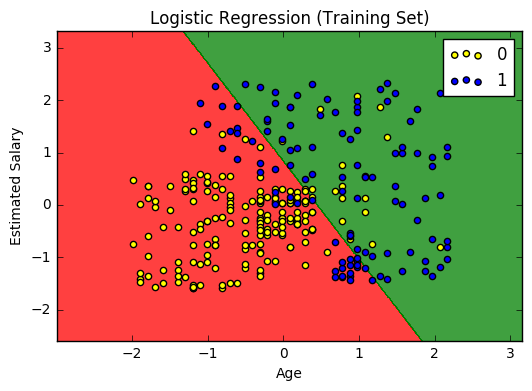

In [40]:
from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() -1, stop = X_set[:, 0].max() +1, step = 0.01), 
np.arange(start = X_set[:, 1].min() -1, stop = X_set[:, 1].max() +1, step = 0.01))
    
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j,0], X_set[y_set == j, 1], c = ListedColormap(('yellow', 'blue'))(i), label = j)
    
plt.title('Logistic Regression (Training Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

* Os pontos são as pontos de observação do training set
* A região vermelha é a prevista de purchased 0 (não comprou) e a verde é 1 (que comprou)
* Pontos amarelos não compraram, e os azuis compraram

Observações:

* Os que tem pouca idade, e pouco salário, não compraram o carro
* Os mais velhos, e com salário maior, compraram o carro


Agora para os dados de teste:

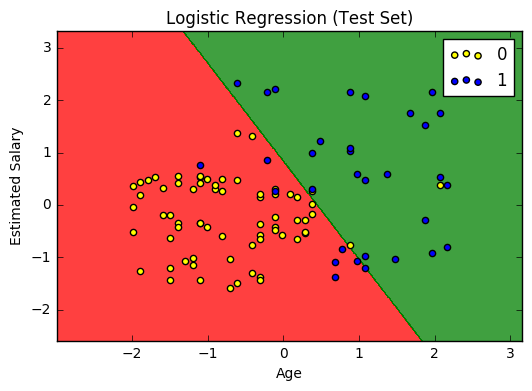

In [41]:
from matplotlib.colors import ListedColormap

X_set, y_set = X_test, y_test

# Pega o menor do valor do X_Set e do maior valor, e incrementa 0.01
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() -1, stop = X_set[:, 0].max() +1, step = 0.01), 
np.arange(start = X_set[:, 1].min() -1, stop = X_set[:, 1].max() +1, step = 0.01))

# Para cada pixel do grafico, aplica o predict, para pintar de vermelho ou verde
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j,0], X_set[y_set == j, 1], c = ListedColormap(('yellow', 'blue'))(i), label = j)
    
plt.title('Logistic Regression (Test Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()